In [ ]:
#Model Development:Data Analytics, we often use Model Development to help us predict future observations from the data we have.
#A Model will help us understand the exact relationship,
#between different variables and how these variables are used to predict the result.



In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
#Linear Regression
#Simple Linear Regression is a method to help us understand the relationship between two variables:
#The result of Linear Regression is a linear function that predicts,
#The response (dependent) variable as a function of the predictor (independent) variable
#The predictor/independent variable (X)
#The response/dependent variable (that we want to predict)(Y)
#Yhat=a+bX
#a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
#b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

In [8]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [7]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
#How could Highway-mpg help us predict car price?
X = df[['highway-mpg']]
Y = df['price']

In [25]:
#Fit the linear model using highway-mpg.
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
#We can output a prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [30]:
#What is the value of the intercept (a)?
lm.intercept_

38423.305858157386

In [31]:
#What is the value of the Slope (b)?
lm.coef_

array([-821.73337832])

In [37]:
#Final answer
# using X and Y 
#𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
price = 38423.31 - 821.73 *X

In [38]:
#Multiple Linear Regression
#What if we want to predict car price using more than one variable?
#If we want to use more variables in our model to predict car price,we can use Multiple Linear Regression.
#Multiple Linear Regression is very similar to Simple Linear Regression,
#but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

In [39]:
#We will illustrate the structure by using four predictor variables,
#but these results can generalize to any integer
#Equation:𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4


In [40]:
#Let's develop a model using these variables as the predictor variables.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [42]:
#Fit the linear model using the four above-mentioned variables.
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
lm.intercept_

-15806.624626329198

In [45]:
lm.coef_
#b1,b2,b3,b4

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [49]:
#as we saw above, we should get a final linear function with the structure:
#Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
#Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [ ]:
#Model Evaluation using Visualization¶
#Now that we've developed some models, how do we evaluate our models and how do we choose the best one? One way to do this is by using visualization.

In [50]:
#import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

In [51]:
#Regression Plot
#When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.
#This plot will show a combination of a scattered data points (a scatter plot), 
#as well as the fitted linear regression line going through the data. 
#This will give us a reasonable estimate of the relationship between the two variables, 
#the strength of the correlation, as well as the direction (positive or negative correlation).

(0, 48269.0031721723)

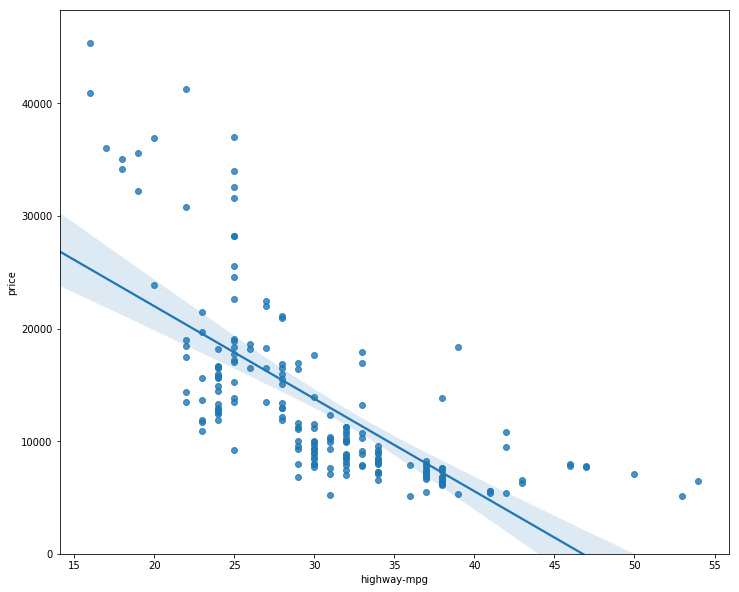

In [57]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [ ]:
#We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. 
#One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line.
#This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. 
#If the data is too far off from the line, this linear model might not be the best model for this data.
#Let's compare this plot to the regression plot of "peak-rpm".

(0, 47422.919330307624)

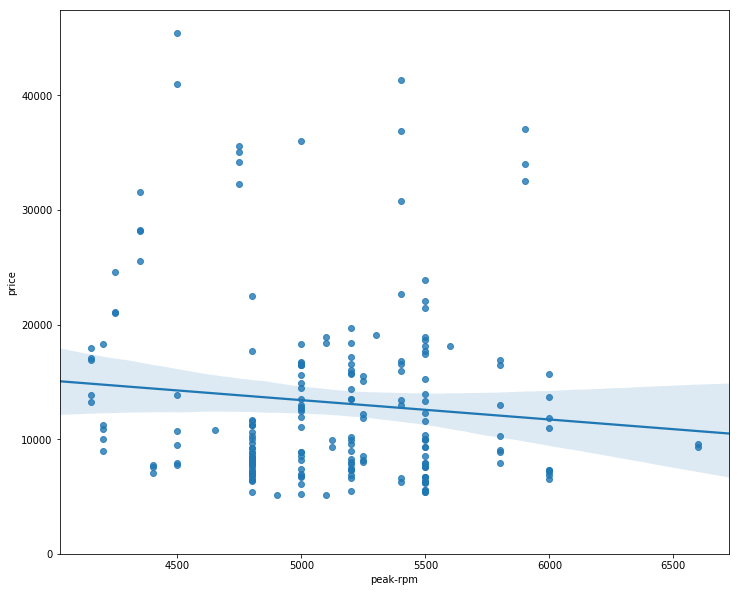

In [58]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [59]:
#Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease.
#The points for "peak-rpm" have more spread around the predicted line, 
#and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases

In [60]:
#Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price".
#we Use the method ".corr()" to verify our answer.
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#Residual Plot
#A good way to visualize the variance of the data is to use a residual plot.
